In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('infant_development_dataset.csv')
dataset.head()

,infant_id,age_months,height_cm,weight_kg,milestone_score,speech_score,period
0,1,31,87.131229,15.069140,68.021936,102.133267,pre_covid
1,2,25,87.237638,16.034869,75.305256,89.340480,pre_covid
2,3,23,85.887134,16.977430,55.608942,89.827530,pre_covid
3,4,30,85.666237,14.464047,81.424646,84.722783,pre_covid
4,5,5,73.751033,10.164924,77.066009,84.761291,pre_covid


In [3]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
print(dataset.head())

   infant_id  age_months  height_cm  weight_kg  milestone_score  speech_score  \
0        111          17  76.769686  13.610782        85.009172     77.179558   
1        420          26  83.051313  10.863639        68.045308     93.570985   
2        566          28  81.182053  15.418023        91.281495     85.559252   
3         78          13  75.995788  11.470351        75.280803     86.737652   
4        182          26  82.293630  15.004258        85.510677     85.311021   

       period  
0   pre_covid  
1  post_covid  
2  post_covid  
3   pre_covid  
4   pre_covid  


In [4]:
dataset.isna().sum()

,0
infant_id,0
age_months,0
height_cm,0
weight_kg,0
milestone_score,0
speech_score,0
period,0


In [5]:
x = dataset.iloc[:, :-1].values
x

array([[111.        ,  17.        ,  76.76968601,  13.61078245,
         85.00917188,  77.17955804],
       [420.        ,  26.        ,  83.05131333,  10.86363906,
         68.04530769,  93.57098541],
       [566.        ,  28.        ,  81.18205336,  15.41802335,
         91.28149546,  85.55925192],
       ...,
       [271.        ,  14.        ,  72.98423838,  12.75260549,
         76.82129208,  73.9939117 ],
       [436.        ,  12.        ,  74.07420025,   8.29130125,
         49.37666341,  76.08972237],
       [103.        ,  17.        ,  80.89907367,  12.23801102,
         87.68727492,  78.75725317]])

In [6]:
y = dataset.iloc[:, -1].values
y

array(['pre_covid', 'post_covid', 'post_covid', 'pre_covid', 'pre_covid',
       'during_covid', 'pre_covid', 'post_covid', 'pre_covid',
       'during_covid', 'pre_covid', 'pre_covid', 'pre_covid',
       'post_covid', 'during_covid', 'during_covid', 'pre_covid',
       'during_covid', 'pre_covid', 'pre_covid', 'pre_covid',
       'post_covid', 'post_covid', 'post_covid', 'during_covid',
       'post_covid', 'pre_covid', 'pre_covid', 'post_covid', 'post_covid',
       'post_covid', 'pre_covid', 'pre_covid', 'during_covid',
       'pre_covid', 'post_covid', 'pre_covid', 'post_covid', 'post_covid',
       'during_covid', 'during_covid', 'pre_covid', 'post_covid',
       'post_covid', 'pre_covid', 'pre_covid', 'post_covid', 'pre_covid',
       'pre_covid', 'post_covid', 'during_covid', 'during_covid',
       'pre_covid', 'post_covid', 'post_covid', 'during_covid',
       'during_covid', 'pre_covid', 'pre_covid', 'pre_covid', 'pre_covid',
       'pre_covid', 'during_covid', 'post_covid', 

In [7]:
#encoding missing values

dataset.fillna({
    'age_months': dataset['age_months'].mean(),
    'height_cm': dataset['height_cm'].mean(),
    'weight_kg': dataset['weight_kg'].mean(),
    'speech_score': dataset['speech_score'].mean(),
    'period': dataset['period'].mode()[0] }, inplace=True)

In [8]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2,

In [9]:
x

array([[111.        ,  17.        ,  76.76968601,  13.61078245,
         85.00917188,  77.17955804],
       [420.        ,  26.        ,  83.05131333,  10.86363906,
         68.04530769,  93.57098541],
       [566.        ,  28.        ,  81.18205336,  15.41802335,
         91.28149546,  85.55925192],
       ...,
       [271.        ,  14.        ,  72.98423838,  12.75260549,
         76.82129208,  73.9939117 ],
       [436.        ,  12.        ,  74.07420025,   8.29130125,
         49.37666341,  76.08972237],
       [103.        ,  17.        ,  80.89907367,  12.23801102,
         87.68727492,  78.75725317]])

In [10]:
#training the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
x_train

array([[474.        ,  23.        ,  78.97951366,  11.39366171,
         89.97368971,  72.95447563],
       [191.        ,  29.        ,  85.97125872,  14.49243952,
         77.66009333,  99.77444832],
       [222.        ,  16.        ,  68.49672067,  11.45039966,
         56.13318342,  69.78835013],
       ...,
       [514.        ,  18.        ,  80.83463022,   7.73946824,
         60.99326009,  78.1433206 ],
       [ 70.        ,  18.        ,  73.6238647 ,  11.50645298,
         92.04922922,  75.42671625],
       [274.        ,  35.        ,  83.67491912,  17.9355326 ,
         86.68249059,  73.3671546 ]])

In [11]:
!pip install tabpfn

In [12]:
from tabpfn import TabPFNClassifier

In [13]:
tabpfn = TabPFNClassifier()
tabpfn.fit(x_train, y_train)

tabpfn-v2-classifier-finetuned-zk73skhh.(…):   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/tabpfn/classifier.py:484: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


TabPFNClassifier()

In [14]:
y_pred_tabpfn = tabpfn.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_tabpfn)
accuracy

1.0

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

cm_tabpfn = confusion_matrix(y_test, y_pred_tabpfn)
print(cm_tabpfn)

cs_report_tabpfn = classification_report(y_test, y_pred_tabpfn)
print(cs_report_tabpfn)

[[49  0  0]
 [ 0 53  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        48

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Train the model
# Use the encoded training labels (y_train_encoded) from the previous cell
xgb.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(x_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")

Accuracy: 0.9866666666666667


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

cs_report_xgb = classification_report(y_test, y_pred_xgb)
print(cs_report_xgb)

[[49  0  0]
 [ 2 51  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        53
           2       1.00      1.00      1.00        48

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



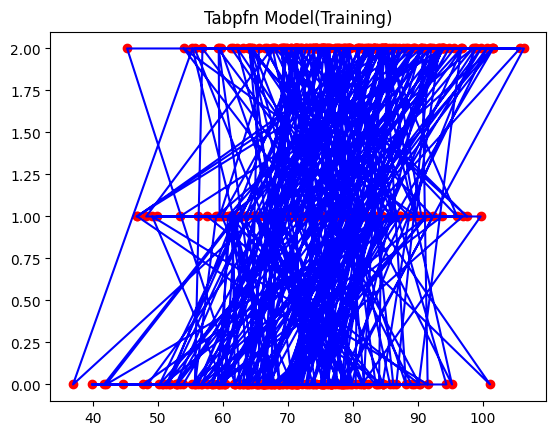

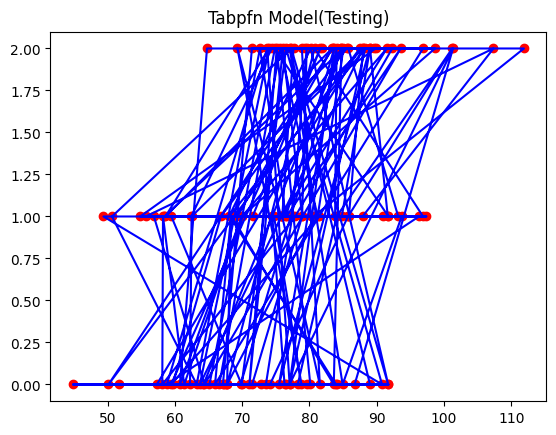

In [19]:
#vizualisation

import matplotlib.pyplot as plt

plt.scatter(x_train[:, 4],y_train,color = 'red')
plt.plot(x_train[:, 4],tabpfn.predict(x_train),color = 'blue')
plt.title('Tabpfn Model(Training)')
plt.show()

plt.scatter(x_test[:, 4],y_test,color = 'red')
plt.plot(x_test[:,4],y_pred_tabpfn,color = 'blue')
plt.title('Tabpfn Model(Testing)')
plt.show()



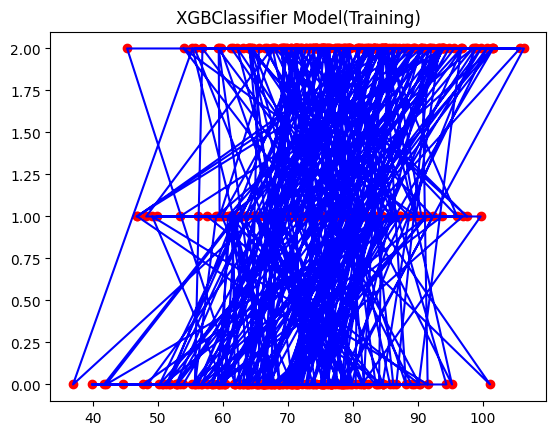

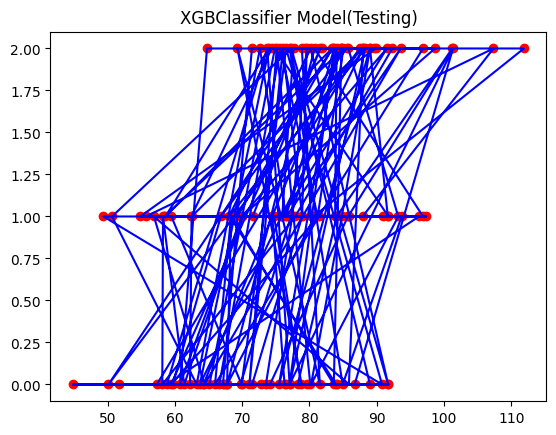

In [20]:
#vizualisation

import matplotlib.pyplot as plt

plt.scatter(x_train[:, 4],y_train,color = 'red')
plt.plot(x_train[:, 4],xgb.predict(x_train),color = 'blue')
plt.title('XGBClassifier Model(Training)')
plt.show()

plt.scatter(x_test[:, 4],y_test,color = 'red')
plt.plot(x_test[:,4],y_pred_xgb,color = 'blue')
plt.title('XGBClassifier Model(Testing)')
plt.show()



In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from tabpfn import TabPFNRegressor

In [23]:
future_years = [5, 10]   # predict 5 and 10 years ahead
future_months = [x * 12 for x in future_years]  # convert to months

predictions = {}

for period in dataset['period'].unique():
    subset = dataset[dataset['period'] == period]

    # Features: age_months
    X = subset[['age_months']]
    # Targets: each numeric development metric
    targets = ['height_cm', 'weight_kg', 'milestone_score', 'speech_score']

    preds = {}
    for target in targets:
        y = subset[target]

        model = TabPFNRegressor()
        model.fit(X, y)

        # Predict future
        future_preds = {}
        for f in future_months:
            pred_value = model.predict(np.array([[subset['age_months'].max() + f]]))[0]
            future_preds[f] = pred_value

        preds[target] = future_preds

    predictions[period] = preds


tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

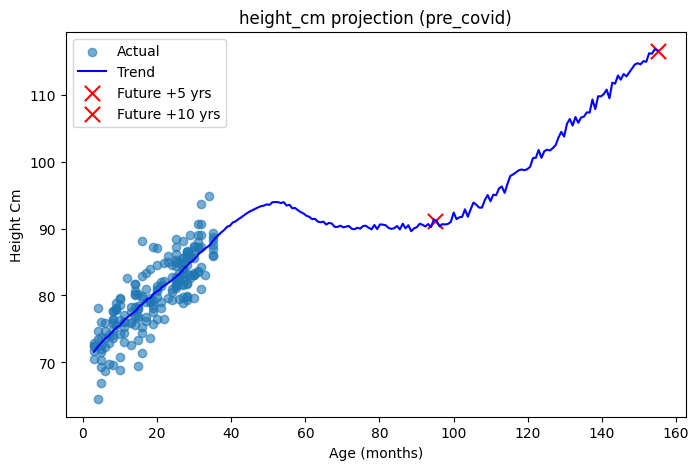

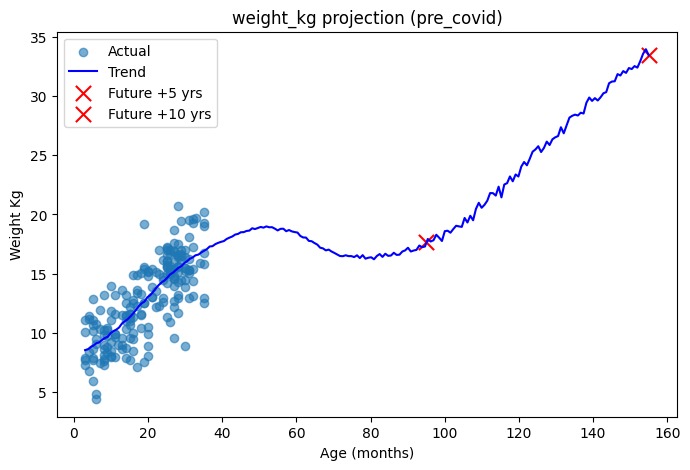

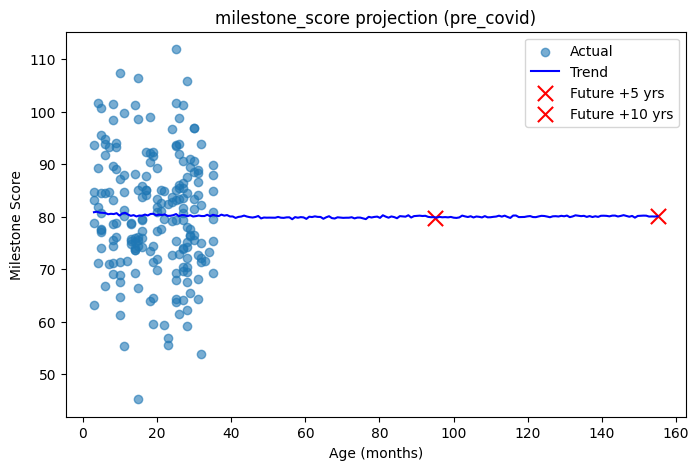

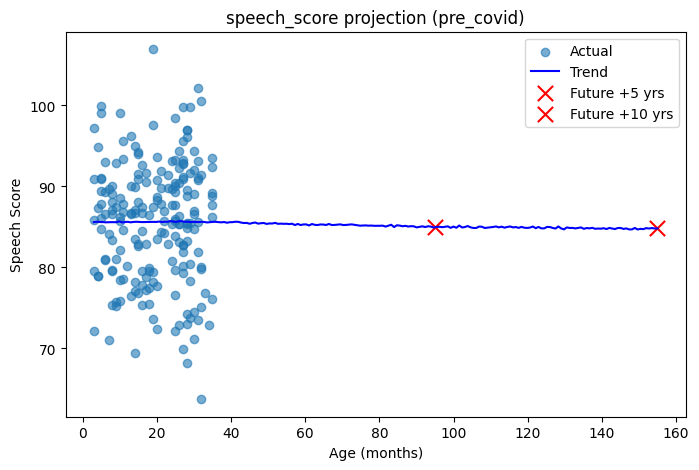

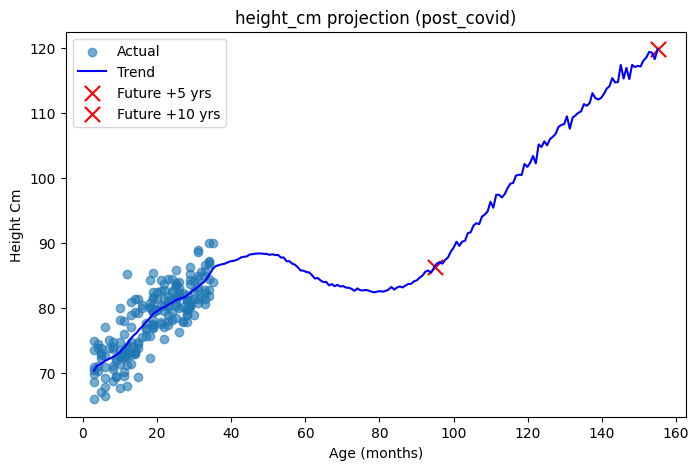

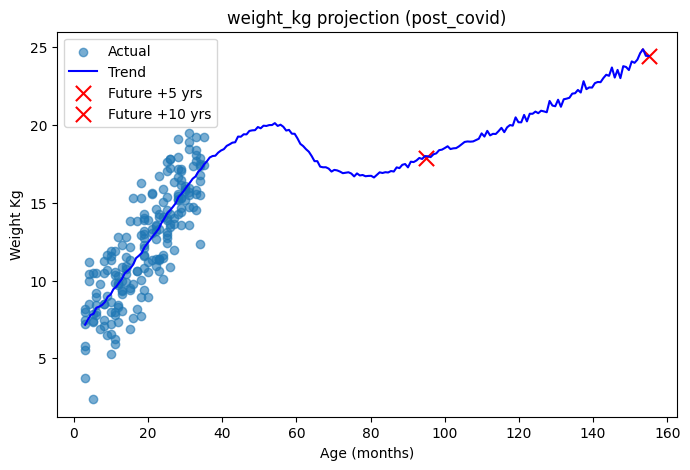

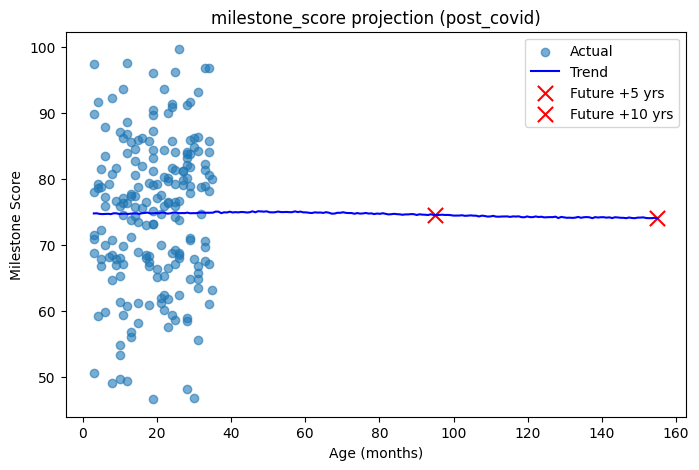

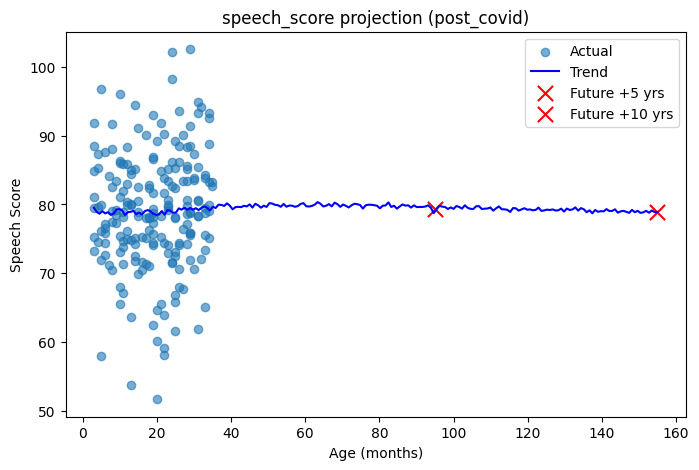

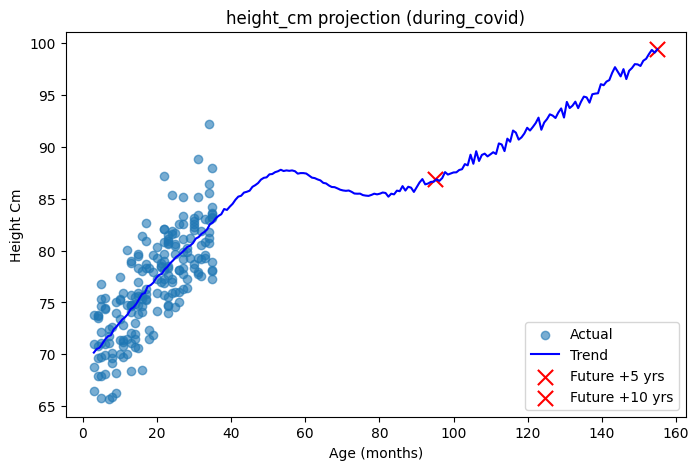

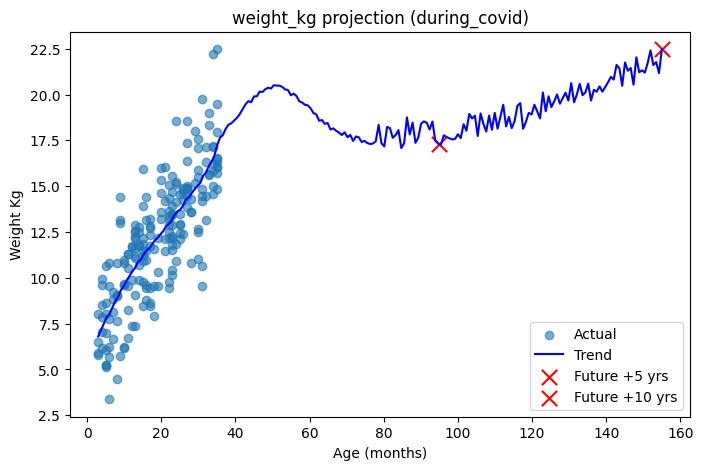

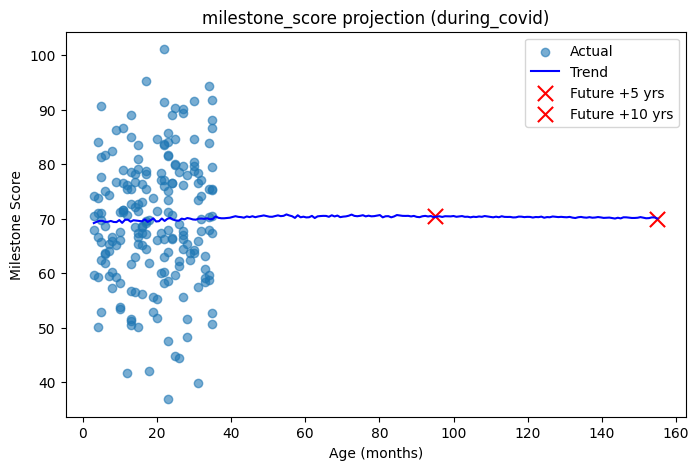

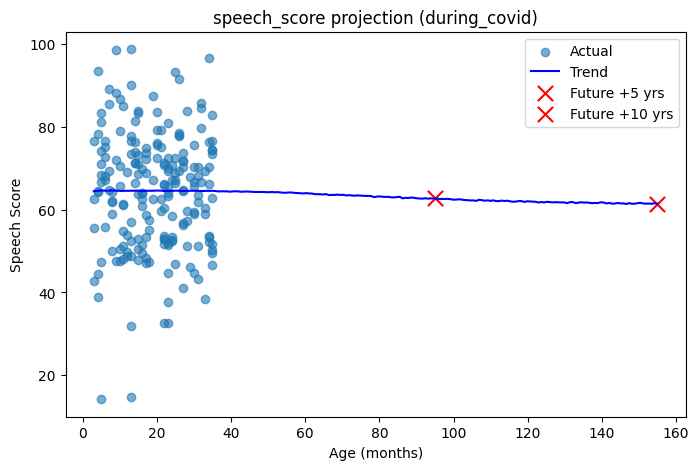

{'during_covid': {'height_cm': {60: np.float32(86.88728),
                                120: np.float32(99.43535)},
                  'milestone_score': {60: np.float32(70.51701),
                                      120: np.float32(70.04303)},
                  'speech_score': {60: np.float32(62.722458),
                                   120: np.float32(61.43306)},
                  'weight_kg': {60: np.float32(17.298584),
                                120: np.float32(22.468071)}},
 'post_covid': {'height_cm': {60: np.float32(86.34541),
                              120: np.float32(119.750916)},
                'milestone_score': {60: np.float32(74.57428),
                                    120: np.float32(74.05167)},
                'speech_score': {60: np.float32(79.371925),
                                 120: np.float32(78.89287)},
                'weight_kg': {60: np.float32(17.90031),
                              120: np.float32(24.43844)}},
 'pre_covid': {'height_cm': 

In [24]:
# ======================================
# Step 3: Visualize projections
# ======================================
def plot_future(period, predictions, target):
    subset = dataset[dataset['period'] == period]
    plt.figure(figsize=(8,5))
    plt.scatter(subset['age_months'], subset[target], alpha=0.6, label="Actual")

    # Fit line
    model = TabPFNRegressor()
    model.fit(subset[['age_months']], subset[target])
    ages_range = np.linspace(subset['age_months'].min(), subset['age_months'].max() + max(future_months), 200).reshape(-1,1)
    plt.plot(ages_range, model.predict(ages_range), color="blue", label="Trend")

    # Future predictions
    for f, val in predictions[period][target].items():
        future_age = subset['age_months'].max() + f
        plt.scatter(future_age, val, color="red", marker="x", s=120, label=f"Future +{f//12} yrs")

    plt.title(f"{target} projection ({period})")
    plt.xlabel("Age (months)")
    plt.ylabel(target.replace("_"," ").title())
    plt.legend()
    plt.show()

# Example: visualize all metrics for Pre-COVID
for period in dataset['period'].unique():
    for target in ['height_cm','weight_kg','milestone_score','speech_score']:
        plot_future(period, predictions, target)

# ======================================
# Step 4: Display numerical results
# ======================================
import pprint
pprint.pprint(predictions)

In [25]:
import pickle
from flask import Flask, request, render_template

In [26]:
# Save model & encoder
with open("tabpfn.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [27]:
!pip install flask-ngrok

In [28]:
!pip install pyngrok


In [29]:
import os
os.makedirs("templates", exist_ok=True)


In [30]:
import pandas as pd
import numpy as np
from tabpfn import TabPFNRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

# ================================
# 1. Load your dataset
# ================================
df = pd.read_csv("infant_development_dataset.csv")

# Features (5 inputs matching your Flask form)
X = df[["age_months", "height_cm", "weight_kg", "speech_score", "milestone_score"]]

# Target (label to predict, e.g., 'period')
y = df["period"]

# ================================
# 2. Split dataset (train/test)
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ================================
# 3. Encode target variable (after split)
# ================================
# TabPFNRegressor requires numerical targets, so we encode the categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# ================================
# 4. Train model
# ================================
# Using TabPFNRegressor as requested, but note it's for regression tasks
# If you intend classification, use TabPFNClassifier instead.
model1 = TabPFNRegressor()
model1.fit(X_train, y_train_encoded)

# ================================
# 5. Save trained model and label encoder
# ================================
# Removed redundant model saving as the user is evaluating the tabpfn model trained earlier.
# pickle.dump(model1, open("tabpfn.pkl", "wb"))
# pickle.dump(label_encoder, open("label_encoder.pkl", "wb")) # Save the encoder too

print(" Train-test split updated to 0.25")
print(" y_train and y_test encoded")
print(" Model trained with updated split")

 Train-test split updated to 0.25
 y_train and y_test encoded
 Model trained with updated split


In [ ]:
# app.py
from flask import Flask, render_template, request, jsonify, redirect, url_for
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import threading
import time
import os
import requests
from pyngrok import ngrok, conf
import atexit
from tabpfn import TabPFNClassifier

# Initialize Flask app
app = Flask(__name__)

# Global variables
model = None
label_encoder = None
ngrok_tunnel = None

def load_model_and_encoder(dataset_df):
    """Load and train the machine learning model"""
    global model, label_encoder

    try:
        # Prepare features and target using the provided dataset
        X = dataset_df[['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']]
        y = dataset_df['period']

        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.25, random_state=42
        )

        # Train model
        print("Training TabPFN Classifier...")
        model = TabPFNClassifier(device='cpu')
        model.fit(X_train, y_train)

        print(f"Model trained successfully!")
        print(f"Classes: {list(label_encoder.classes_)}")

    except Exception as e:
        print(f"Error loading or training model: {str(e)}")
        raise e

def setup_ngrok():
    """Setup ngrok tunnel"""
    global ngrok_tunnel

    try:
        # Kill existing ngrok processes
        ngrok.kill()

        # Use your ngrok auth token
        NGROK_AUTH_TOKEN = "33N0g5bhEm02YO8FRP8FBG6Xg0G_YzFxJPJoeBNUbEn7KFxw"

        if NGROK_AUTH_TOKEN:
            ngrok.set_auth_token(NGROK_AUTH_TOKEN)
            print("✅ Ngrok authtoken set successfully")

        # Create tunnel
        ngrok_tunnel = ngrok.connect(5000)
        public_url = ngrok_tunnel.public_url

        print("🌐 Ngrok tunnel created successfully!")
        print("=" * 60)
        print(f"🚀 Your app is now live at: {public_url}")
        print("=" * 60)

        return public_url

    except Exception as e:
        print(f"❌ Error setting up ngrok: {str(e)}")
        print("💡 You can still access the app locally at: http://localhost:5000")
        return None

def cleanup():
    """Cleanup function to close ngrok tunnel on exit"""
    if ngrok_tunnel:
        print("🔒 Closing ngrok tunnel...")
        ngrok.disconnect(ngrok_tunnel.public_url)
        ngrok.kill()
    print("👋 Ngrok tunnel closed")

# Register cleanup function
atexit.register(cleanup)

@app.route('/')
def home():
    """Home page"""
    return '''
    <!DOCTYPE html>
    <html>
    <head>
        <title>Infant Development Prediction</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 0;
                padding: 20px;
                background: #f5f5f5;
            }
            .container {
                max-width: 600px;
                margin: 0 auto;
                background: white;
                padding: 30px;
                border-radius: 10px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            }
            h1 {
                color: #333;
                text-align: center;
                margin-bottom: 30px;
                font-size: 24px;
            }
            h2 {
                color: #555;
                font-size: 18px;
                margin-bottom: 20px;
            }
            .form-group {
                margin-bottom: 20px;
            }
            label {
                display: block;
                margin-bottom: 8px;
                font-weight: bold;
                color: #333;
            }
            input {
                width: 100%;
                padding: 12px;
                border: 2px solid #ddd;
                border-radius: 5px;
                font-size: 16px;
                box-sizing: border-box;
            }
            input:focus {
                border-color: #007bff;
                outline: none;
            }
            button {
                background: #007bff;
                color: white;
                padding: 15px 30px;
                border: none;
                border-radius: 5px;
                cursor: pointer;
                font-size: 16px;
                width: 100%;
                font-weight: bold;
            }
            button:hover {
                background: #0056b3;
            }
            .result {
                margin-top: 30px;
                padding: 25px;
                border-radius: 10px;
                background: #f8f9fa;
                border: 2px solid #dee2e6;
            }
            .prediction-title {
                font-size: 20px;
                font-weight: bold;
                color: #155724;
                margin-bottom: 15px;
                text-align: center;
            }
            .confidence {
                font-size: 16px;
                color: #666;
                margin-bottom: 20px;
                text-align: center;
            }
            .probability-item {
                margin: 10px 0;
                padding: 10px;
                background: white;
                border-radius: 5px;
                border-left: 4px solid #007bff;
            }
            .probability-label {
                font-weight: bold;
                color: #333;
            }
            .probability-value {
                float: right;
                color: #666;
            }
            .back-link {
                display: block;
                text-align: center;
                margin-top: 20px;
                color: #007bff;
                text-decoration: none;
            }
            .back-link:hover {
                text-decoration: underline;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Infant Development Period Classifier</h1>
            <form method="post" action="/predict">
                <h2>Predict Development Period</h2>

                <div class="form-group">
                    <label>Age (months):</label>
                    <input type="number" step="0.1" name="age_months" required>
                </div>

                <div class="form-group">
                    <label>Height (cm):</label>
                    <input type="number" step="0.1" name="height_cm" required>
                </div>

                <div class="form-group">
                    <label>Weight (kg):</label>
                    <input type="number" step="0.1" name="weight_kg" required>
                </div>

                <div class="form-group">
                    <label>Milestone Score (0-100):</label>
                    <input type="number" step="0.1" name="milestone_score" min="0" max="100" required>
                </div>

                <div class="form-group">
                    <label>Speech Score (0-100):</label>
                    <input type="number" step="0.1" name="speech_score" min="0" max="100" required>
                </div>

                <button type="submit">Predict Development Period</button>
            </form>
        </div>
    </body>
    </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    """Prediction endpoint"""
    try:
        if model is None or label_encoder is None:
            return '''
            <div class="container">
                <h1>Infant Development Period Classifier</h1>
                <div class="result">
                    <div style="color: #721c24; text-align: center;">
                        Cannot connect to server. Please wait and refresh.
                    </div>
                </div>
            </div>
            ''', 503

        # Get data from form
        data = request.form

        # Validate input
        required_fields = ['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']
        for field in required_fields:
            if field not in data:
                return f'''
                <div class="container">
                    <h1>Infant Development Period Classifier</h1>
                    <div class="result">
                        <div style="color: #721c24; text-align: center;">
                            Missing field: {field}
                        </div>
                    </div>
                </div>
                ''', 400

        # Prepare features
        features = np.array([[
            float(data['age_months']),
            float(data['height_cm']),
            float(data['weight_kg']),
            float(data['milestone_score']),
            float(data['speech_score'])
        ]])

        # Make prediction
        prediction_encoded = model.predict(features)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        # Get probabilities
        probabilities = model.predict_proba(features)[0]

        # Create probability dictionary
        prob_dict = {}
        for i, class_name in enumerate(label_encoder.classes_):
            prob_dict[class_name] = float(probabilities[i])

        confidence = float(np.max(probabilities))

        # Create result HTML in the exact format you want
        result_html = f'''
        <!DOCTYPE html>
        <html>
        <head>
            <title>Prediction Result</title>
            <style>
                body {{
                    font-family: Arial, sans-serif;
                    margin: 0;
                    padding: 20px;
                    background: #f5f5f5;
                }}
                .container {{
                    max-width: 600px;
                    margin: 0 auto;
                    background: white;
                    padding: 30px;
                    border-radius: 10px;
                    box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                }}
                .prediction-title {{
                    font-size: 24px;
                    font-weight: bold;
                    color: #155724;
                    margin-bottom: 15px;
                    text-align: center;
                }}
                .confidence {{
                    font-size: 18px;
                    color: #666;
                    margin-bottom: 25px;
                    text-align: center;
                }}
                .probability-section {{
                    margin: 20px 0;
                }}
                .probability-item {{
                    margin: 15px 0;
                    padding: 15px;
                    background: #f8f9fa;
                    border-radius: 8px;
                    border-left: 5px solid #007bff;
                }}
                .probability-label {{
                    font-weight: bold;
                    color: #333;
                    font-size: 16px;
                }}
                .probability-value {{
                    float: right;
                    color: #666;
                    font-size: 16px;
                    font-weight: bold;
                }}
                .back-link {{
                    display: block;
                    text-align: center;
                    margin-top: 30px;
                    color: #007bff;
                    text-decoration: none;
                    font-size: 16px;
                }}
                .back-link:hover {{
                    text-decoration: underline;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="prediction-title">Predicted Development Period: {prediction_label.upper().replace('_', ' ')}</div>
                <div class="confidence">Confidence: {(confidence * 100):.2f}%</div>

                <div class="probability-section">
                    <div style="font-weight: bold; margin-bottom: 15px; font-size: 18px;">Probability Distribution:</div>
        '''

        # Add probability items
        for class_name, prob in prob_dict.items():
            percentage = prob * 100
            display_name = class_name.upper().replace('_', ' ')
            result_html += f'''
                    <div class="probability-item">
                        <span class="probability-label">{display_name}</span>
                        <span class="probability-value">{percentage:.2f}%</span>
                    </div>
            '''

        result_html += '''
                </div>
                <a href="/" class="back-link">← Make Another Prediction</a>
            </div>
        </body>
        </html>
        '''
        return result_html

    except Exception as e:
        return f'''
        <div class="container">
            <h1>Infant Development Period Classifier</h1>
            <div class="result">
                <div style="color: #721c24; text-align: center;">
                    Prediction error: {str(e)}
                </div>
            </div>
        </div>
        ''', 400

# ... keep the rest of your code the same (api_predict, health_check, start_application, etc.)

@app.route('/api/predict', methods=['POST'])
def api_predict():
    """API endpoint for JSON responses"""
    try:
        if model is None or label_encoder is None:
            return jsonify({
                'status': 'error',
                'message': 'Model not loaded'
            }), 503

        data = request.get_json()

        # Validate input
        required_fields = ['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']
        for field in required_fields:
            if field not in data:
                return jsonify({
                    'status': 'error',
                    'message': f'Missing field: {field}'
                }), 400

        # Prepare features
        features = np.array([[
            float(data['age_months']),
            float(data['height_cm']),
            float(data['weight_kg']),
            float(data['milestone_score']),
            float(data['speech_score'])
        ]])

        # Make prediction
        prediction_encoded = model.predict(features)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]
        probabilities = model.predict_proba(features)[0]
        confidence = float(np.max(probabilities))

        # Create probability dictionary
        prob_dict = {}
        for i, class_name in enumerate(label_encoder.classes_):
            prob_dict[class_name] = float(probabilities[i])

        return jsonify({
            'status': 'success',
            'prediction': prediction_label,
            'confidence': confidence,
            'probabilities': prob_dict
        })

    except Exception as e:
        return jsonify({
            'status': 'error',
            'message': str(e)
        }), 400

@app.route('/health')
def health_check():
    """Health check endpoint"""
    return jsonify({
        'status': 'healthy',
        'model_loaded': model is not None,
        'classes': label_encoder.classes_.tolist() if label_encoder else None
    })

def start_application(dataset_df):
    """Start the Flask application with ngrok"""
    print("🚀 Starting Flask Application with Ngrok...")

    # Load and train model first
    print("📦 Loading and training machine learning model...")
    load_model_and_encoder(dataset_df)

    # Setup ngrok in a separate thread with delay
    def delayed_ngrok():
        time.sleep(3)  # Wait for Flask to start
        setup_ngrok()

    ngrok_thread = threading.Thread(target=delayed_ngrok)
    ngrok_thread.daemon = True
    ngrok_thread.start()

    # Start Flask app
    print("🌍 Starting Flask server on http://localhost:5000")
    print("⏳ Please wait for ngrok tunnel to be established...")
    app.run(host='0.0.0.0', port=5000, debug=False, threaded=True)

# For running directly
if __name__ == '__main__':
    # You need to have 'dataset' variable available
    if 'dataset' in globals():
        start_application(dataset)
    else:
        print("❌ Error: 'dataset' DataFrame not found.")
        print("💡 Please load your dataset first before running this script.")

🚀 Starting Flask Application with Ngrok...
📦 Loading and training machine learning model...
Training TabPFN Classifier...
Model trained successfully!
Classes: ['during_covid', 'post_covid', 'pre_covid']
🌍 Starting Flask server on http://localhost:5000
⏳ Please wait for ngrok tunnel to be established...
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


✅ Ngrok authtoken set successfully
🌐 Ngrok tunnel created successfully!
🚀 Your app is now live at: https://nondilatable-evanescently-jeri.ngrok-free.dev


INFO:werkzeug:127.0.0.1 - - [29/Sep/2025 11:55:14] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2025 11:56:06] "POST /predict HTTP/1.1" 200 -
